# Image Anoymization Techqniques
In this notebook we explore different approaches to "anonymizing" an image by making its subject not identifiable. 
We use opencve to identify faces. if you get errors in the face detection coderun `pip install opencv-contrib-python --upgrade`, restart the kernel and redo

In [11]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

## Original image

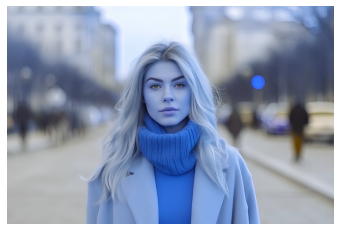

In [12]:
def show_image(img, size = -1):
        if size>0:
            plt.figure(figsize=(size, size), dpi=80)
        plt.imshow(img)
        plt.axis('off')   
image = cv2.imread('../images/woman.jpg')
show_image(image)

Use opencv to detect a face

In [13]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt.xml")
faces = face_classifier.detectMultiScale(image, scaleFactor=1.3, minNeighbors=5,   minSize=(30, 30)) 
print("{0} Face(s) found!".format(len(faces)))

1 Face(s) found!


## Image Blurring

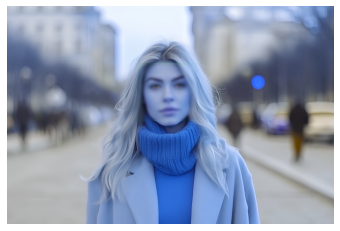

In [14]:
# Blurring
blurred_image = image.copy()
for (x, y, w, h) in faces: 
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2) 
    roi = image[y:y+h, x:x+w] 
    # applying a gaussian blur over this new rectangle area 
    roi = cv2.GaussianBlur(roi,(99, 99), 0) 
    # impose this blurred image on original image to get final image 
    blurred_image[y:y+roi.shape[0], x:x+roi.shape[1]] = roi 
show_image(blurred_image)


## Adding Random Noise

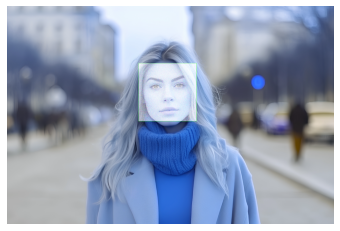

In [15]:
perturbed_image = image.copy()
#Using random noise
for (x, y, w, h) in faces: 
    cv2.rectangle(perturbed_image, (x, y), (x + w, y + h), (0, 255, 0), 2) 
    roi = perturbed_image[y:y+h, x:x+w] 
    # applying a gaussian blur over this new rectangle area 
    # Add random noise to the image
    noise = np.random.normal(0, 128, roi.shape).astype(np.uint8)
    roi = cv2.add(roi, noise)
    # impose the noised face on original image to get final image 
    perturbed_image[y:y+roi.shape[0], x:x+roi.shape[1]] = roi 
show_image(perturbed_image)


## Pixelation

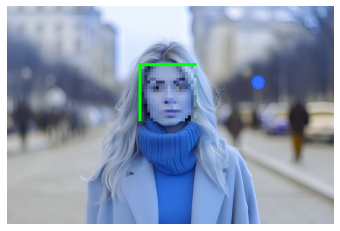

In [16]:
# pixelate
pixelated_image = image.copy()
for (x, y, w, h) in faces: 
    roi = pixelated_image[y:y+h, x:x+w]
    # Pixelate the ROI
    roi = cv2.resize(roi, (20, 20), interpolation=cv2.INTER_NEAREST)
    roi = cv2.resize(roi, (w, h), interpolation=cv2.INTER_NEAREST)
    # Replace the original image area with pixelated ROI
    pixelated_image[y:y+h, x:x+w] = roi
show_image(pixelated_image)

## Image Overlay

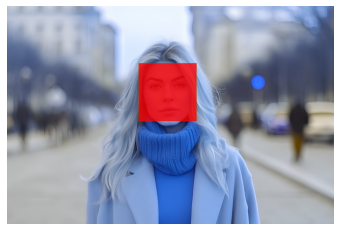

In [17]:
# Define the red color and opacity
red = (255, 0, 0)
opacity = 0.8
overlaid_image = image.copy()
for (x, y, w, h) in faces: 
    overlay = image.copy()
    cv2.rectangle(overlay, (x, y), (x + w, y + h), red, -1)
    cv2.addWeighted(overlay, opacity, overlaid_image, 1 - opacity, 0, overlaid_image)
show_image(overlaid_image)